Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [2]:
# imports
import requests
import os
import pandas as pd
apikey = os.environ['FOURSQUARE_API']
from pprint import pprint

In [64]:
city_bike_df = pd.read_csv('city_bikes_output_file.csv')
city_bike_df

,name,latitude,longitude,empty_slots,free_bikes
0,Queen St E / Woodward Ave,43.665269,-79.319796,5,12
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,15,0
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10,13
3,Bond St / Queen St E,43.653236,-79.376716,22,1
4,Church St / Alexander St,43.663722,-79.380288,4,23
5,University Ave / Gerrard St W (East Side),43.657763,-79.389165,19,6
6,Edward St / Yonge St,43.656729,-79.382736,4,17
7,Euclid Ave / Bloor St W,43.664467,-79.414783,11,8
8,Yonge St / Aylmer Ave,43.675492,-79.388858,10,5
9,Davenport Rd / Avenue Rd,43.674991,-79.396273,6,3


In [63]:
# finding duplicate values
city_bike_df.duplicated().value_counts()

False    685
dtype: int64

In [47]:
yelp_df = pd.read_csv('yelp_data.csv')
yelp_df

,name,review_count,rating,price,location,latitude,longitude
0,Richmond Station,904,4.5,$$$,1 Richmond Street W,43.651373,-79.379285
1,Mogouyan Hand-Pulled Noodles,65,4.5,$$,124 Dundas St W,43.655730,-79.384490
2,The Rabbit Hole,35,4.0,NaN,21 Adelaide Street W,43.649950,-79.379760
3,Hana Don,14,4.5,NaN,128 Dundas Street W,43.655720,-79.384540
4,Pai Northern Thai Kitchen,3470,4.5,$$,18 Duncan Street,43.647840,-79.388720
5,Katsuya,496,4.5,$$,66 Gerrard Street E,43.659950,-79.378820
6,Gyubee Japanese Grill - Dundas,210,4.5,$$$,157 Dundas St W,43.655143,-79.385763
7,Chefs Hall,320,4.0,$$,111 Richmond Street W,43.650352,-79.383795
8,Hendriks Restaurant & Bar,115,4.0,$$$,218 Yonge Street,43.653501,-79.380048
9,The Senator,492,4.0,$$,249 Victoria Street,43.655740,-79.378960


In [50]:
# finding duplicate values
yelp_df.duplicated().value_counts()

False    20
dtype: int64

In [65]:
merged_df = pd.merge(city_bike_df, yelp_df, on='name', how='outer')
merged_df

,name,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,price,location,latitude_y,longitude_y
0,Queen St E / Woodward Ave,43.665269,-79.319796,5.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Bond St / Queen St E,43.653236,-79.376716,22.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Church St / Alexander St,43.663722,-79.380288,4.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
5,University Ave / Gerrard St W (East Side),43.657763,-79.389165,19.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Edward St / Yonge St,43.656729,-79.382736,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
7,Euclid Ave / Bloor St W,43.664467,-79.414783,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
8,Yonge St / Aylmer Ave,43.675492,-79.388858,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Davenport Rd / Avenue Rd,43.674991,-79.396273,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


I tried to do different joins but it was not giving a good database, so ended up using the outer join with some NaN values. Also tried to remove the NaN values but it ended up removing my data, additionally i tried to update NaN values with mean but for yelp data which is small, the mean value is not a reflection of the true data base

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [66]:
merged_df.head()

,name,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,price,location,latitude_y,longitude_y
0,Queen St E / Woodward Ave,43.665269,-79.319796,5.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Bond St / Queen St E,43.653236,-79.376716,22.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Church St / Alexander St,43.663722,-79.380288,4.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   empty_slots                  8 non-null      float64
 1   extra                        8 non-null      object 
 2   free_bikes                   8 non-null      float64
 3   id                           8 non-null      object 
 4   latitude                     8 non-null      float64
 5   longitude                    8 non-null      float64
 6   name                         18 non-null     object 
 7   timestamp                    8 non-null      object 
 8   Unnamed: 0                   10 non-null     float64
 9   fsq_id                       10 non-null     object 
 10  categories                   10 non-null     object 
 11  chains                       10 non-null     object 
 12  distance                     10 non-null     float64
 13  link                  

In [73]:
merged_df.shape

(705, 11)

In [75]:
# remove unwanted columns
merged_df = merged_df.drop('longitude_y', axis=1)

In [76]:
merged_df.head()

,name,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,price,location,latitude_y
0,Queen St E / Woodward Ave,43.665269,-79.319796,5.0,12.0,NaN,NaN,NaN,NaN,NaN
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,15.0,0.0,NaN,NaN,NaN,NaN,NaN
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10.0,13.0,NaN,NaN,NaN,NaN,NaN
3,Bond St / Queen St E,43.653236,-79.376716,22.0,1.0,NaN,NaN,NaN,NaN,NaN
4,Church St / Alexander St,43.663722,-79.380288,4.0,23.0,NaN,NaN,NaN,NaN,NaN


In [77]:
# remove unwanted columns
merged_df = merged_df.drop('latitude_y', axis=1)

In [78]:
merged_df.head()

,name,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,price,location
0,Queen St E / Woodward Ave,43.665269,-79.319796,5.0,12.0,NaN,NaN,NaN,NaN
1,Primrose Ave / Davenport Rd,43.671420,-79.445947,15.0,0.0,NaN,NaN,NaN,NaN
2,Queen St. E / Rhodes Ave.,43.666224,-79.317693,10.0,13.0,NaN,NaN,NaN,NaN
3,Bond St / Queen St E,43.653236,-79.376716,22.0,1.0,NaN,NaN,NaN,NaN
4,Church St / Alexander St,43.663722,-79.380288,4.0,23.0,NaN,NaN,NaN,NaN


In [68]:
merged_df.describe()

,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,latitude_y,longitude_y
count,685.000000,685.000000,685.000000,685.000000,20.000000,20.000000,20.000000,20.000000
mean,43.667737,-79.391337,9.315328,8.632117,391.200000,4.250000,43.652925,-79.382888
std,0.030158,0.059826,7.343881,6.909745,766.800365,0.303488,0.003336,0.003227
min,43.588077,-79.544491,0.000000,0.000000,4.000000,4.000000,43.647840,-79.391450
25%,43.648928,-79.425000,3.000000,3.000000,29.500000,4.000000,43.650214,-79.384086
50%,43.661667,-79.392125,9.000000,7.000000,136.000000,4.000000,43.652551,-79.382771
75%,43.679188,-79.366470,14.000000,14.000000,432.000000,4.500000,43.655723,-79.379996
max,43.788319,-79.123505,39.000000,33.000000,3470.000000,5.000000,43.659950,-79.378820


the average number of free bikes per station is about 8.6 and average rating is 4.25


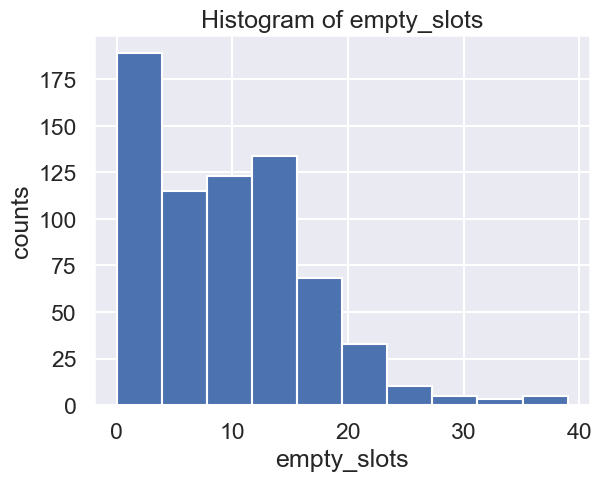

In [80]:
import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(merged_df['empty_slots'])

# Customize other aspects of the plot
ax.set_title('Histogram of empty_slots')
ax.set_xlabel('empty_slots')
ax.set_ylabel('counts')

# Display the plot
plt.show()

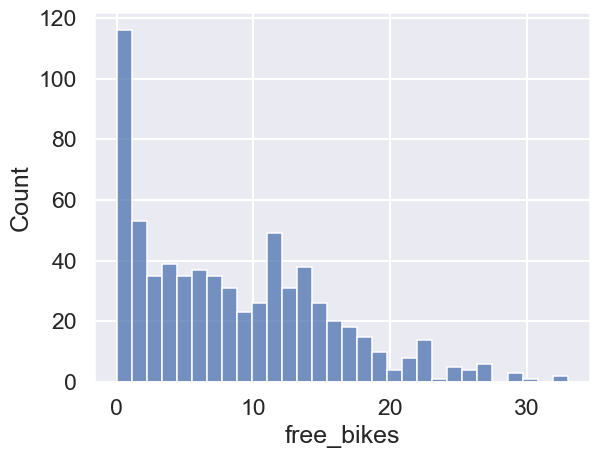

In [79]:
import seaborn as sns

sns.set_theme(context = 'talk',     # recomend   context = 'talk'
              style = 'darkgrid',
              palette = 'deep',         # colorblind
              font = 'sans-serif',
              font_scale = 1
             ) # this will affect both sns and plt

# you can also set a figure size that will affect all sns plots in your notebook
#sns.set(rc={"figure.figsize":(10, 6)})

#seaborn histogram
sns.histplot(data=merged_df, x="free_bikes", bins=30)       # dont have to have to make a figure or subplot when using seaborn

plt.show()


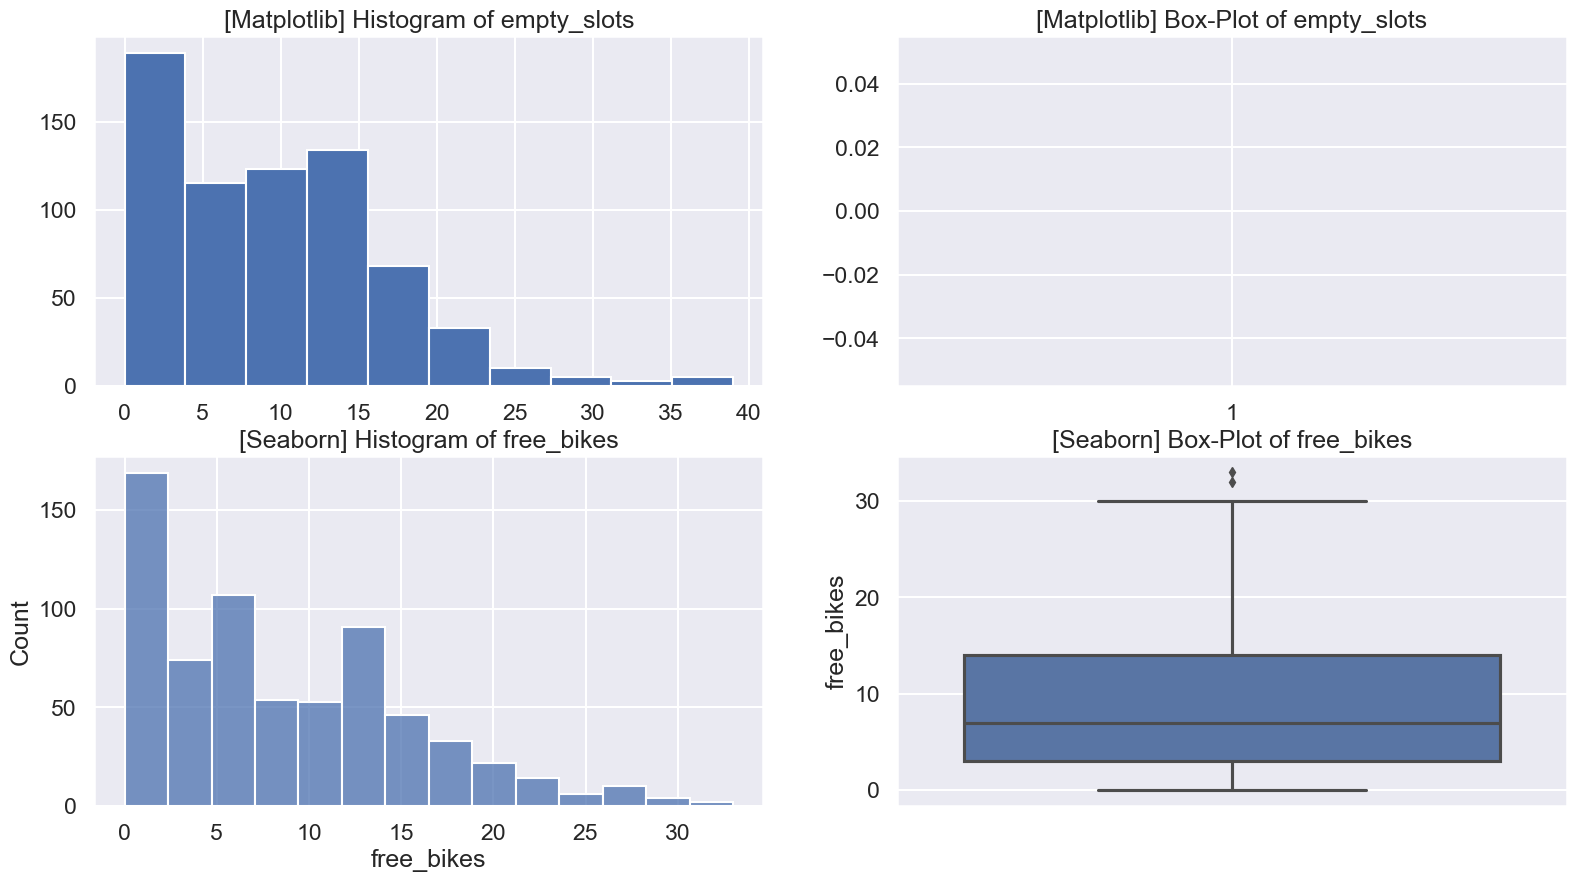

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(19, 10))

#matplotlib
axes[0,0].hist(merged_df['empty_slots'])
axes[0,0].set_title('[Matplotlib] Histogram of empty_slots')

axes[0,1].boxplot(merged_df['empty_slots'])
axes[0,1].set_title('[Matplotlib] Box-Plot of empty_slots')

#seaborn
sns.histplot(ax=axes[1,0], data=merged_df, x="free_bikes")
axes[1,0].set_title('[Seaborn] Histogram of free_bikes')

sns.boxplot(ax=axes[1,1], data=merged_df, y="free_bikes")
axes[1,1].set_title('[Seaborn] Box-Plot of free_bikes')

plt.show()

In [82]:
merged_df.corr() #to check if there is a correlation

C:\Users\MizCeey\AppData\Local\Temp\ipykernel_24868\35518180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr() #to check if there is a correlation


,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating
latitude_x,1.000000,0.364170,0.252552,-0.374687,NaN,NaN
longitude_x,0.364170,1.000000,0.020264,-0.042641,NaN,NaN
empty_slots,0.252552,0.020264,1.000000,-0.629216,NaN,NaN
free_bikes,-0.374687,-0.042641,-0.629216,1.000000,NaN,NaN
review_count,NaN,NaN,NaN,NaN,1.000000,0.167248
rating,NaN,NaN,NaN,NaN,0.167248,1.000000


C:\Users\MizCeey\AppData\Local\Temp\ipykernel_24868\2822260574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap="tab20c")


<Axes: >

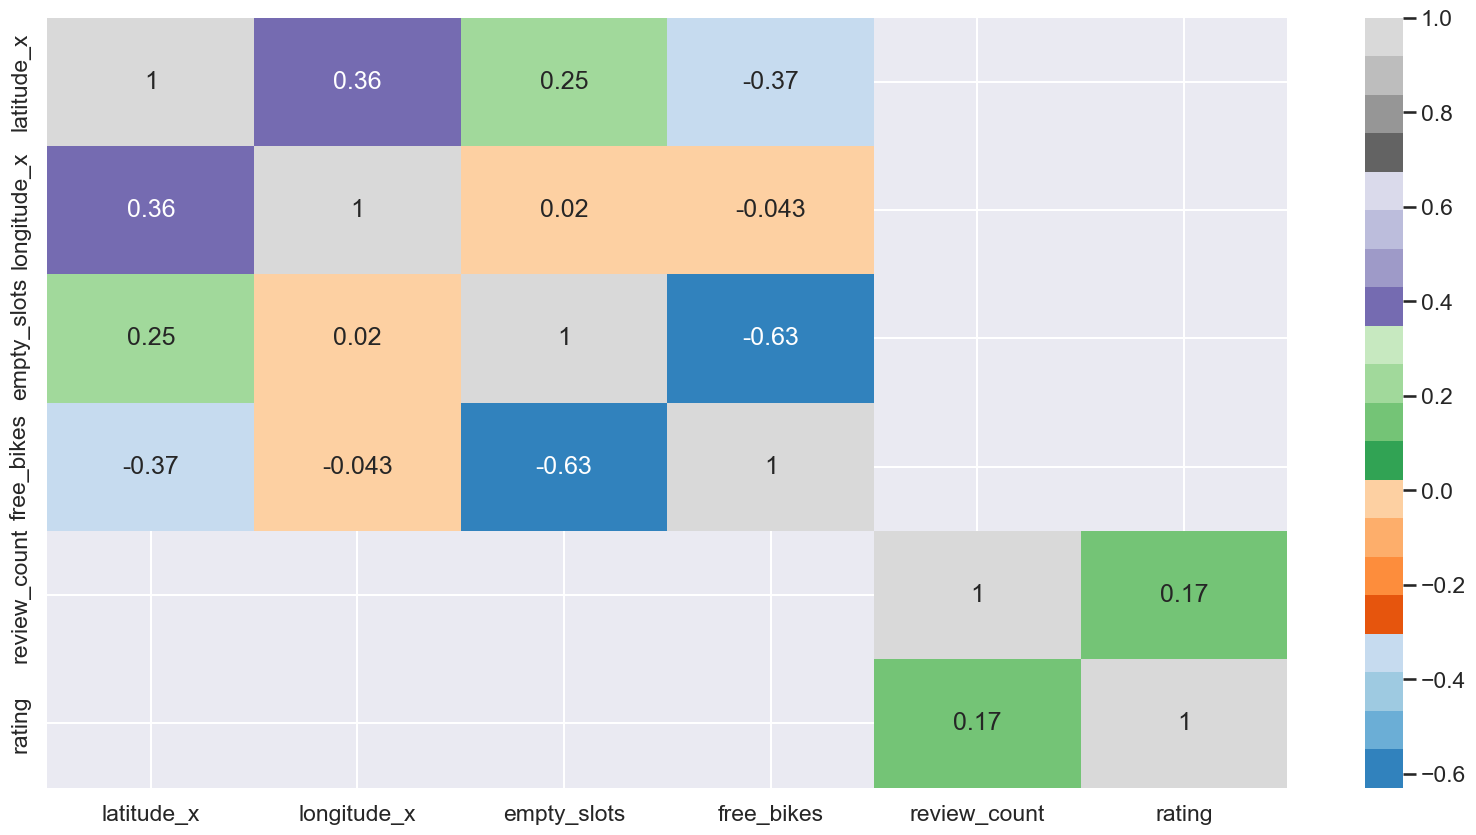

In [84]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_df.corr(), annot=True, cmap="tab20c")

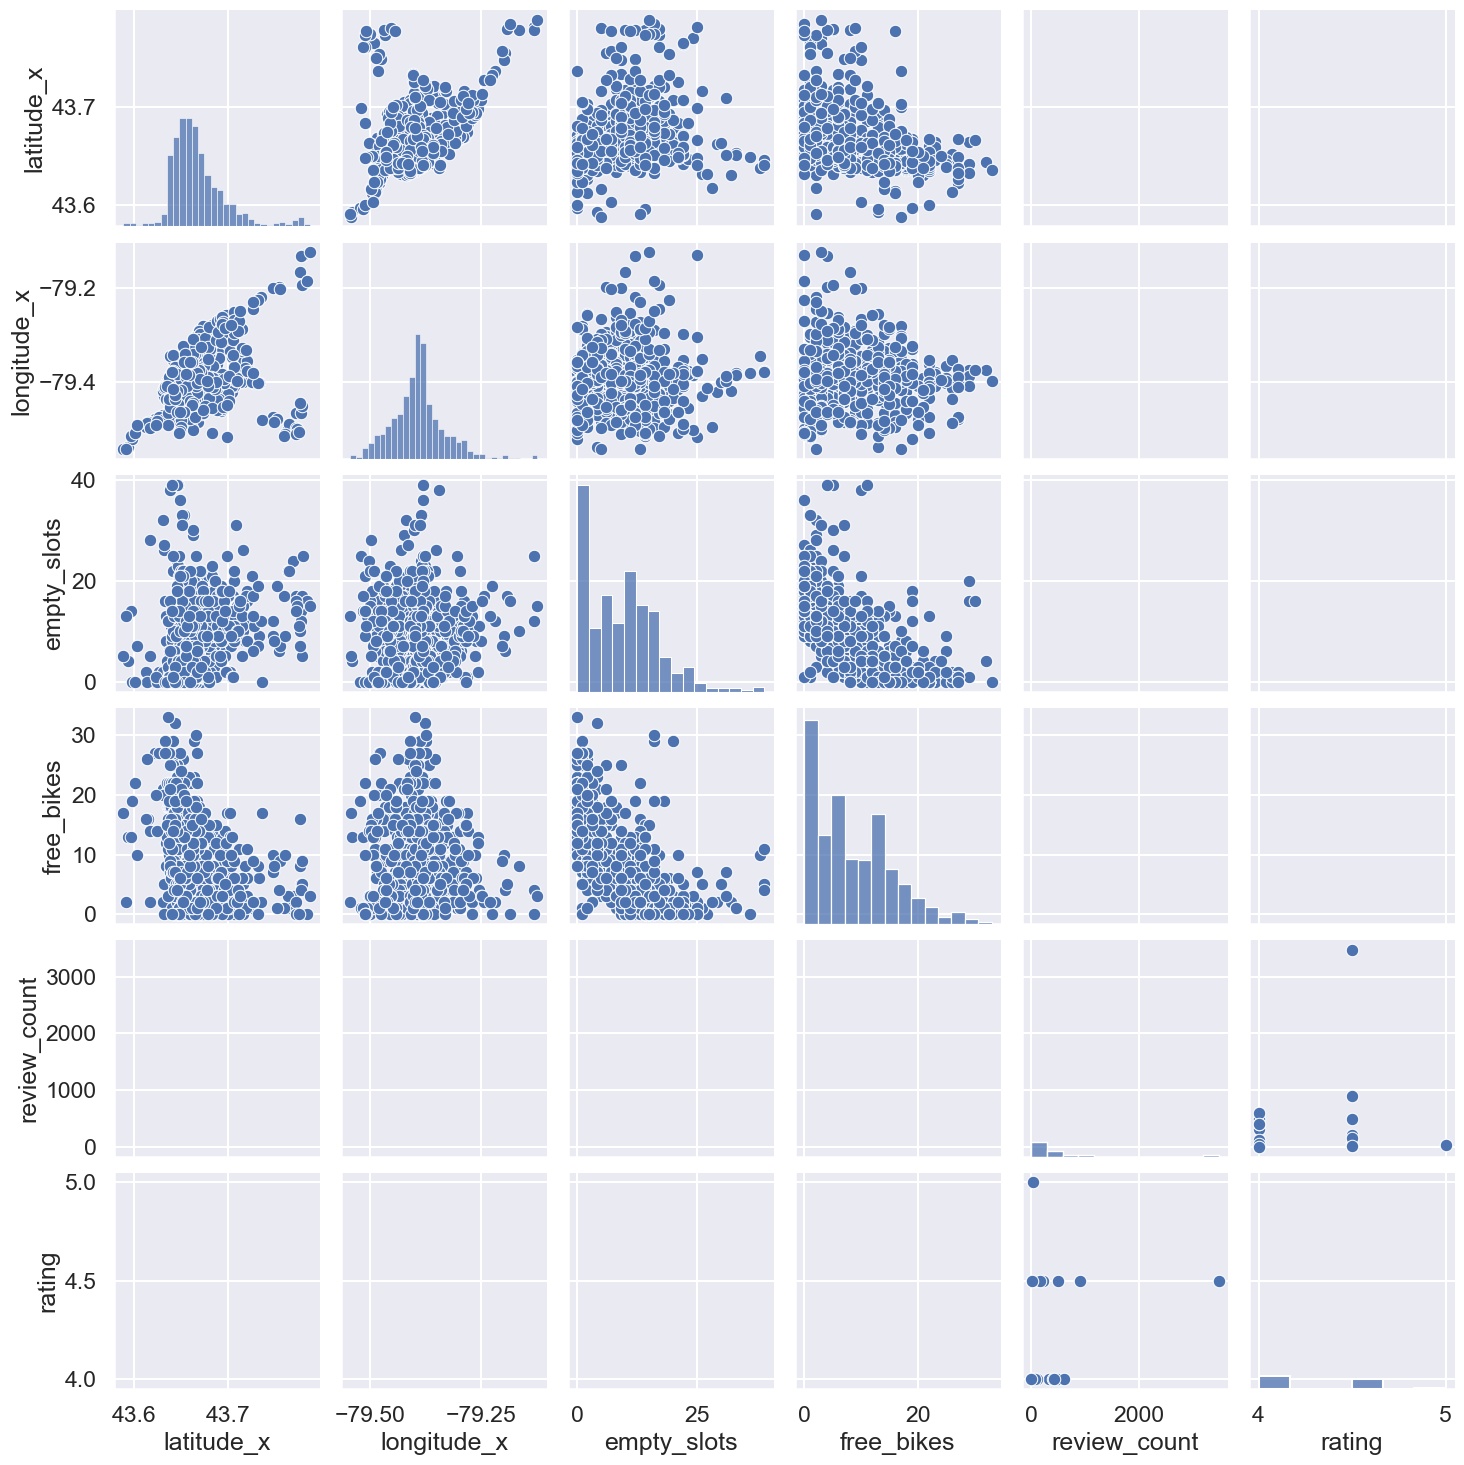

In [85]:
sns.pairplot(merged_df)
plt.show()
#to view and compare many distributions at the same time

In [132]:
# Write the DataFrame to a CSV file
merged_df.to_csv("merged_data.csv", index=False)

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [86]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [87]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [88]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

Look at the data before and after the join to validate your data.

In [89]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          705 non-null    object 
 1   latitude_x    685 non-null    float64
 2   longitude_x   685 non-null    float64
 3   empty_slots   685 non-null    float64
 4   free_bikes    685 non-null    float64
 5   review_count  20 non-null     float64
 6   rating        20 non-null     float64
 7   price         13 non-null     object 
 8   location      19 non-null     object 
dtypes: float64(6), object(3)
memory usage: 55.1+ KB


In [122]:
create_bike_table = """
CREATE TABLE IF NOT EXISTS bike(
 "name" TEXT NOT NULL,
  name TEXT PRIMARY KEY,
  latitude_x FLOAT,
  longitude_x FLOAT,
  empty_slots FLOAT,
  free_bikes FLOAT,
  review_count FLOAT,
  rating FLOAT,
  price TEXT,
  location TEXT
  );
"""

In [123]:
execute_query(connection, create_bike_table)

Query executed successfully


In [124]:
# creating column list for insertion
cols = ",".join([str(i) for i in merged_df.columns.tolist()])

In [125]:
cols

'name,latitude_x,longitude_x,empty_slots,free_bikes,review_count,rating,price,location'

In [126]:
# Insert DataFrame recrds one by one.
for i,row in merged_df.iterrows():
    print (row)

name            Queen St E / Woodward Ave
latitude_x                      43.665269
longitude_x                    -79.319796
empty_slots                           5.0
free_bikes                           12.0
review_count                          NaN
rating                                NaN
price                                 NaN
location                              NaN
Name: 0, dtype: object
name            Primrose Ave / Davenport Rd
latitude_x                         43.67142
longitude_x                      -79.445947
empty_slots                            15.0
free_bikes                              0.0
review_count                            NaN
rating                                  NaN
price                                   NaN
location                                NaN
Name: 1, dtype: object
name            Queen St. E / Rhodes Ave.
latitude_x                      43.666224
longitude_x                    -79.317693
empty_slots                          10.0
free_bikes  

In [ ]:
for i,row in merged_df.iterrows():
    sql = "INSERT INTO bike (" + cols + ") VALUES (" + ",".join(["?"] * len(row)) + ")"
    execute_query(connection, sql, tuple(row))

In [ ]:
#sql = "INSERT INTO bike (" +cols + ") VALUES (" + "%s,"*(len(row)-1) + "%s)"

In [ ]:
select_bike = "SELECT * FROM bike_table"
bike = execute_query(connection, select_bike)

for price in bike:
    print(price)